In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# Print out the Results Tables

Load data

In [2]:
df_new = pd.read_csv('..\\data\\dataRelusNewNet.csv')
df_old = pd.read_csv('..\\data\\dataRelusOldNet.csv')

## Results for the New Network

Create a table showing the mean margin at each time point for each network configuration

In [3]:
RELU_SETS_NEW = ["['strd1' 'strd2' 'stn' 'gpe']",
            "['strd2' 'stn' 'gpe']",
            "['strd1' 'stn' 'gpe']",
            "['strd1' 'strd2' 'gpe']",
            "['strd1' 'strd2' 'stn']",
            "['strd1']",
            "['strd2']",
            "['stn']",
            "['gpe']",
            "[]",]

tab_new = {'Pops with ReLu' : RELU_SETS_NEW,
        'Margin min/max t0' : [df_new[df_new['relus_list']==r_set]['Margin_top_bottom_t0'].mean() for r_set in RELU_SETS_NEW],
        'SD min/max t0' : [df_new[df_new['relus_list']==r_set]['Margin_top_bottom_t0'].std() for r_set in RELU_SETS_NEW],
        'Margin min/max t1' : [df_new[df_new['relus_list']==r_set]['Margin_top_bottom_t1'].mean() for r_set in RELU_SETS_NEW],
        'SD min/max t1' : [df_new[df_new['relus_list']==r_set]['Margin_top_bottom_t1'].std() for r_set in RELU_SETS_NEW],
        'Margin min/max t2' : [df_new[df_new['relus_list']==r_set]['Margin_top_bottom_t2'].mean() for r_set in RELU_SETS_NEW],
        'SD min/max t2' : [df_new[df_new['relus_list']==r_set]['Margin_top_bottom_t2'].std() for r_set in RELU_SETS_NEW],
        'Margin 2nd/max t0' : [df_new[df_new['relus_list']==r_set]['Margin_top2_t0'].mean() for r_set in RELU_SETS_NEW],
        'SD 2nd/max t0' : [df_new[df_new['relus_list']==r_set]['Margin_top2_t0'].std() for r_set in RELU_SETS_NEW],
        'Margin 2nd/max t1' : [df_new[df_new['relus_list']==r_set]['Margin_top2_t1'].mean() for r_set in RELU_SETS_NEW],
        'SD 2nd/max t1' : [df_new[df_new['relus_list']==r_set]['Margin_top2_t1'].std() for r_set in RELU_SETS_NEW],
        'Margin 2nd/max t2' : [df_new[df_new['relus_list']==r_set]['Margin_top2_t2'].mean() for r_set in RELU_SETS_NEW],
        'SD 2nd/max t2' : [df_new[df_new['relus_list']==r_set]['Margin_top2_t2'].std() for r_set in RELU_SETS_NEW],
        }

pd.DataFrame(tab_new)

,Pops with ReLu,Margin min/max t0,SD min/max t0,Margin min/max t1,SD min/max t1,Margin min/max t2,SD min/max t2,Margin 2nd/max t0,SD 2nd/max t0,Margin 2nd/max t1,SD 2nd/max t1,Margin 2nd/max t2,SD 2nd/max t2
0,['strd1' 'strd2' 'stn' 'gpe'],0.134070,0.023377,0.134334,0.023800,0.133193,0.026176,0.083472,0.032301,0.067146,0.009450,0.082513,0.032542
1,['strd2' 'stn' 'gpe'],0.134070,0.023377,0.134334,0.023800,0.133193,0.026176,0.083472,0.032301,0.067146,0.009450,0.082513,0.032542
2,['strd1' 'stn' 'gpe'],0.117608,0.019084,0.117339,0.019151,0.116770,0.020318,0.072268,0.026588,0.059159,0.008698,0.071838,0.026597
3,['strd1' 'strd2' 'gpe'],0.134070,0.023377,0.134334,0.023800,0.133193,0.026176,0.083472,0.032301,0.067146,0.009450,0.082513,0.032542
4,['strd1' 'strd2' 'stn'],0.168197,0.032135,0.167401,0.032445,0.165410,0.036625,0.108827,0.044834,0.085574,0.013180,0.107796,0.046416
5,['strd1'],0.168197,0.032135,0.167401,0.032445,0.165410,0.036625,0.108827,0.044834,0.085574,0.013180,0.107796,0.046416
6,['strd2'],0.168197,0.032135,0.167401,0.032445,0.165410,0.036625,0.108827,0.044834,0.085574,0.013180,0.107796,0.046416
7,['stn'],0.168197,0.032135,0.167401,0.032445,0.165410,0.036625,0.108827,0.044834,0.085574,0.013180,0.107796,0.046416
8,['gpe'],0.117608,0.019084,0.117339,0.019151,0.116770,0.020318,0.072268,0.026588,0.059159,0.008698,0.071838,0.026597
9,[],0.168197,0.032135,0.167401,0.032445,0.165410,0.036625,0.108827,0.044834,0.085574,0.013180,0.107796,0.046416


## Results for the Original Network

Repeat for the results from the original network by Stewart et al., (2010)

In [4]:
RELU_SETS_OLD = ["['strd1' 'strd2' 'stn' 'gpe' 'gpi']",
        "['strd2' 'stn' 'gpe' 'gpi']",
        "['strd1' 'stn' 'gpe' 'gpi']",
        "['strd1' 'strd2' 'gpe' 'gpi']",
        "['strd1' 'strd2' 'stn' 'gpi']",
        "['strd1' 'strd2' 'stn' 'gpe']",
        "['strd1']",
        "['strd2']",
        "['stn']",
        "['gpe']",
        "['gpi']",
        "[]",]

tab_old = {'Pops with ReLu' : RELU_SETS_OLD,
        'Margin min/max t0' : [df_old[df_old['relus_list']==r_set]['Margin_top_bottom_t0'].mean() for r_set in RELU_SETS_OLD],
        'SD min/max t0' : [df_old[df_old['relus_list']==r_set]['Margin_top_bottom_t0'].std() for r_set in RELU_SETS_OLD],
        'Margin min/max t1' : [df_old[df_old['relus_list']==r_set]['Margin_top_bottom_t1'].mean() for r_set in RELU_SETS_OLD],
        'SD min/max t1' : [df_old[df_old['relus_list']==r_set]['Margin_top_bottom_t1'].std() for r_set in RELU_SETS_OLD],
        'Margin min/max t2' : [df_old[df_old['relus_list']==r_set]['Margin_top_bottom_t2'].mean() for r_set in RELU_SETS_OLD],
        'SD min/max t2' : [df_old[df_old['relus_list']==r_set]['Margin_top_bottom_t2'].std() for r_set in RELU_SETS_OLD],
        'Margin 2nd/max t0' : [df_old[df_old['relus_list']==r_set]['Margin_top2_t0'].mean() for r_set in RELU_SETS_OLD],
        'SD 2nd/max t0' : [df_old[df_old['relus_list']==r_set]['Margin_top2_t0'].std() for r_set in RELU_SETS_OLD],
        'Margin 2nd/max t1' : [df_old[df_old['relus_list']==r_set]['Margin_top2_t1'].mean() for r_set in RELU_SETS_OLD],
        'SD 2nd/max t1' : [df_old[df_old['relus_list']==r_set]['Margin_top2_t1'].std() for r_set in RELU_SETS_OLD],
        'Margin 2nd/max t2' : [df_old[df_old['relus_list']==r_set]['Margin_top2_t2'].mean() for r_set in RELU_SETS_OLD],
        'SD 2nd/max t2' : [df_old[df_old['relus_list']==r_set]['Margin_top2_t2'].std() for r_set in RELU_SETS_OLD],
        }

pd.DataFrame(tab_old)

,Pops with ReLu,Margin min/max t0,SD min/max t0,Margin min/max t1,SD min/max t1,Margin min/max t2,SD min/max t2,Margin 2nd/max t0,SD 2nd/max t0,Margin 2nd/max t1,SD 2nd/max t1,Margin 2nd/max t2,SD 2nd/max t2
0,['strd1' 'strd2' 'stn' 'gpe' 'gpi'],0.376000,5.851389e-17,0.376000,0.000000e+00,0.376000,1.372272e-16,0.188000,0.000000e+00,0.188000,0.000000e+00,0.188000,1.523048e-16
1,['strd2' 'stn' 'gpe' 'gpi'],0.013000,0.000000e+00,0.013000,0.000000e+00,0.013000,1.549751e-16,-0.100000,0.000000e+00,-0.100000,0.000000e+00,-0.100000,0.000000e+00
2,['strd1' 'stn' 'gpe' 'gpi'],0.376000,0.000000e+00,0.376000,0.000000e+00,0.376000,0.000000e+00,0.188000,3.493725e-16,0.188000,2.925695e-17,0.188000,0.000000e+00
3,['strd1' 'strd2' 'gpe' 'gpi'],0.229892,0.000000e+00,0.229892,0.000000e+00,0.229892,0.000000e+00,0.041892,7.314236e-18,0.041892,7.314236e-18,0.041892,1.039548e-16
4,['strd1' 'strd2' 'stn' 'gpi'],0.376000,0.000000e+00,0.376000,0.000000e+00,0.376000,0.000000e+00,0.188000,3.503512e-16,0.188000,2.925695e-17,0.188000,0.000000e+00
5,['strd1' 'strd2' 'stn' 'gpe'],0.376000,1.675583e-16,0.376000,5.851389e-17,0.376000,0.000000e+00,0.188000,0.000000e+00,0.188000,2.925695e-17,0.188000,2.925695e-17
6,['strd1'],0.376000,1.409201e-16,0.376000,1.046728e-16,0.376000,0.000000e+00,0.188000,1.755417e-16,0.188000,8.275114e-17,0.188000,2.925695e-17
7,['strd2'],0.376000,0.000000e+00,0.376000,8.489557e-16,0.376000,8.489557e-16,0.188000,0.000000e+00,0.188000,8.484514e-16,0.188000,8.339513e-16
8,['stn'],0.376000,5.851389e-17,0.376000,0.000000e+00,0.376000,0.000000e+00,0.188000,2.951908e-16,0.188000,3.493725e-16,0.188000,2.416135e-16
9,['gpe'],0.376000,0.000000e+00,0.376000,1.000913e-15,0.376000,5.851389e-17,0.188000,0.000000e+00,0.188000,7.777066e-16,0.188000,2.925695e-17


## Retrieve the raw data in order to plot the selected vs the target action

In [5]:
import os 
## Collect data into dataframe ##
i=0
allData=[]

folder='..\\data_bigSals\\dataRelusOldNet'

for filename in os.listdir(folder):

    filepath = os.path.join(folder, filename)
    arr=np.load(filepath, allow_pickle=True)

    vals=[]
    if i==0:
        header = arr.files
        df = pd.DataFrame(header)

    for item in arr.files:
        vals.append(arr[item])

    allData.append(vals)
    i+=1
    
    
dfold = pd.DataFrame(allData, columns=header)

import os 
## Collect data into dataframe ##
i=0
allData=[]

folder='..\\data_bigSals\\dataRelusNewNet'

for filename in os.listdir(folder):

    filepath = os.path.join(folder, filename)
    arr=np.load(filepath, allow_pickle=True)

    vals=[]
    if i==0:
        header = arr.files
        df = pd.DataFrame(header)

    for item in arr.files:
        vals.append(arr[item])

    allData.append(vals)
    i+=1
    
    
dfnew = pd.DataFrame(allData, columns=header)

Text(0.5, 1.0, 'New Network')

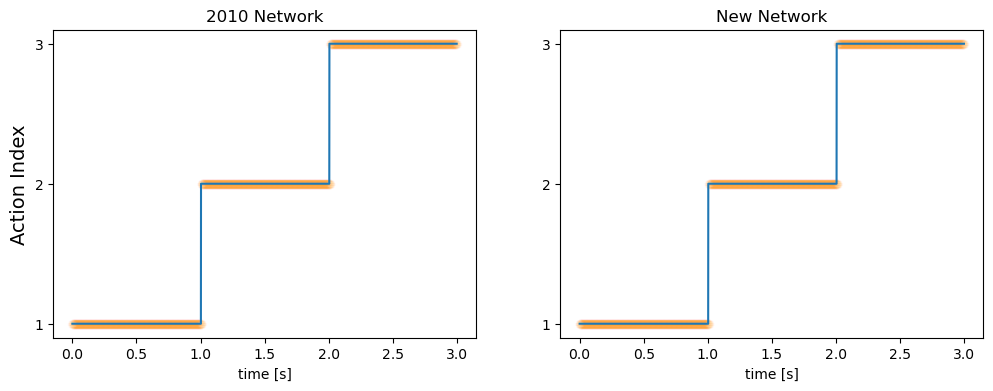

In [6]:
trange= np.arange(0, 3, 0.001)

plt.figure(figsize=(12,4))
 
plt.subplot(1,2,1)
plt.plot(trange, dfold['input_actions'][0].argmax(axis=1)+1)
plt.scatter(trange, dfold['selected_action'][0].argmax(axis=1)+1, alpha=0.01, color='orange')
plt.xlabel("time [s]")
## create markers to be shown in the legend
blue_line = mlines.Line2D([], [], color='#1f77b4', marker='None', linestyle='-',
                        markersize=10, label='Action with max salience')
orange_dot = mlines.Line2D([], [], color='orange', alpha=0.5, marker='.', linestyle='None',
                        markersize=10, label='Selected action')

plt.ylabel("Action Index", fontsize=14)
plt.yticks(np.arange(1, 4, 1))
plt.title('2010 Network')

plt.subplot(1,2,2)
plt.plot(trange, dfnew['input_actions'][0].argmax(axis=1)+1)
plt.scatter(trange, dfnew['decoded_actions'][0]+1, alpha=0.01, color='orange')
plt.xlabel("time [s]")
## create markers to be shown in the legend
blue_line = mlines.Line2D([], [], color='#1f77b4', marker='None', linestyle='-',
                        markersize=10, label='Action with max salience')
orange_dot = mlines.Line2D([], [], color='orange', alpha=0.5, marker='.', linestyle='None',
                        markersize=10, label='Selected action')
plt.yticks(np.arange(1, 4, 1))
plt.title('New Network')

## Plot New Network Performance With and Without ReLUs 

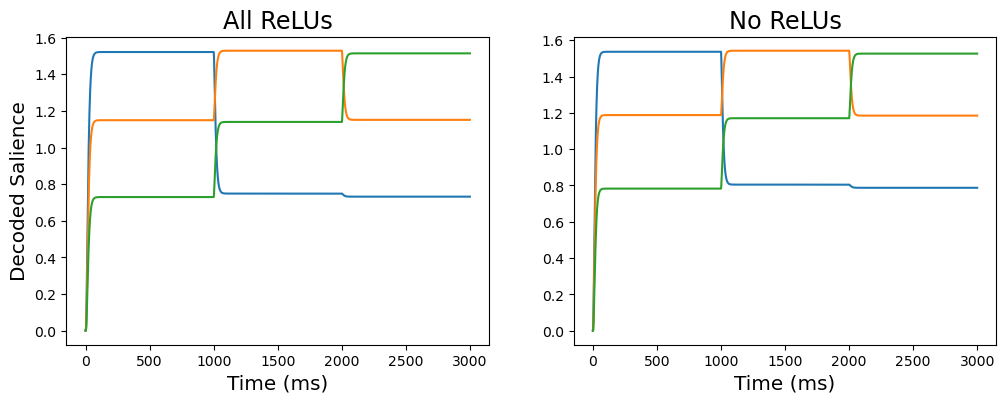

In [7]:
plt.figure(figsize=(12,4))
 
plt.subplot(1,2,1)
plt.plot(dfnew['decoded_saliences'][0])
plt.title('All ReLUs', fontsize='xx-large')
plt.xlabel('Time (ms)', fontsize='x-large')
plt.ylabel('Decoded Salience', fontsize='x-large')

plt.subplot(1,2,2)
plt.plot(dfnew['decoded_saliences'][9])
plt.title('No ReLUs', fontsize='xx-large')
plt.xlabel('Time (ms)', fontsize='x-large')

plt.savefig('newnet_relus.pdf')

## Plot 2010 Network Performance With and Without ReLUs 

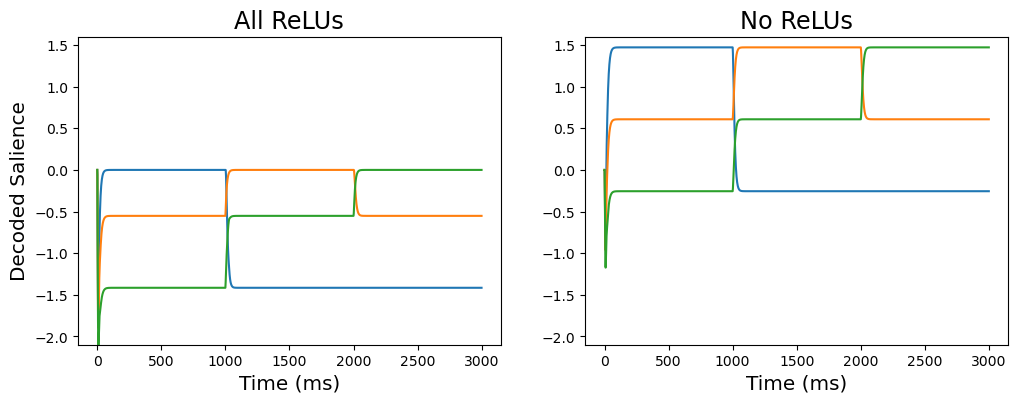

In [8]:
plt.figure(figsize=(12,4))
 
plt.subplot(1,2,1)
plt.plot(dfold['decoded_saliences'][0])
plt.title('All ReLUs', fontsize='xx-large')
plt.xlabel('Time (ms)', fontsize='x-large')
plt.ylabel('Decoded Salience', fontsize='x-large')
plt.ylim(-2.1, 1.6)

plt.subplot(1,2,2)
plt.plot(dfold['decoded_saliences'][9])
plt.title('No ReLUs', fontsize='xx-large')
plt.xlabel('Time (ms)', fontsize='x-large')
plt.ylim(-2.1, 1.6)

plt.savefig('oldnet_relus.pdf')

## Results from Spiking Network

Next let's look at the data from testing out different numbers of neurons

In [9]:
df_spiking = pd.read_csv('..\\data\\dataNeuronsNewNetLIF.csv')

In [10]:
NEURON_SET = [10,20,50,100,200]

tab_neurons= {'N Neurons' : NEURON_SET,
        'Margin min/max t0' : [df_spiking[df_spiking['n_neurons']==N]['Margin_top_bottom_t0'].mean() for N in NEURON_SET],
        'SD min/max t0' : [df_spiking[df_spiking['n_neurons']==N]['Margin_top_bottom_t0'].std() for N in NEURON_SET],
        'Margin min/max t1' : [df_spiking[df_spiking['n_neurons']==N]['Margin_top_bottom_t1'].mean() for N in NEURON_SET],
        'SD min/max t1' : [df_spiking[df_spiking['n_neurons']==N]['Margin_top_bottom_t1'].std() for N in NEURON_SET],
        'Margin min/max t2' : [df_spiking[df_spiking['n_neurons']==N]['Margin_top_bottom_t2'].mean() for N in NEURON_SET],
        'SD min/max t2' : [df_spiking[df_spiking['n_neurons']==N]['Margin_top_bottom_t2'].std() for N in NEURON_SET],
        'Margin 2nd/max t0' : [df_spiking[df_spiking['n_neurons']==N]['Margin_top2_t0'].mean() for N in NEURON_SET],
        'SD 2nd/max t0' : [df_spiking[df_spiking['n_neurons']==N]['Margin_top2_t0'].std() for N in NEURON_SET],
        'Margin 2nd/max t1' : [df_spiking[df_spiking['n_neurons']==N]['Margin_top2_t1'].mean() for N in NEURON_SET],
        'SD 2nd/max t1' : [df_spiking[df_spiking['n_neurons']==N]['Margin_top2_t1'].std() for N in NEURON_SET],
        'Margin 2nd/max t2' : [df_spiking[df_spiking['n_neurons']==N]['Margin_top2_t2'].mean() for N in NEURON_SET],
        'SD 2nd/max t2' : [df_spiking[df_spiking['n_neurons']==N]['Margin_top2_t2'].std() for N in NEURON_SET],
        }

pd.DataFrame(tab_neurons)

,N Neurons,Margin min/max t0,SD min/max t0,Margin min/max t1,SD min/max t1,Margin min/max t2,SD min/max t2,Margin 2nd/max t0,SD 2nd/max t0,Margin 2nd/max t1,SD 2nd/max t1,Margin 2nd/max t2,SD 2nd/max t2
0,10,0.090722,0.118410,0.076457,0.087186,0.062037,0.113565,0.052309,0.090070,0.049307,0.084333,0.028478,0.073858
1,20,0.107468,0.066046,0.072990,0.056636,0.094341,0.062963,0.086765,0.053106,0.026903,0.053482,0.078307,0.054061
2,50,0.139270,0.026862,0.129505,0.035577,0.121111,0.033057,0.073905,0.025079,0.073480,0.022317,0.064067,0.025279
3,100,0.138928,0.024806,0.142216,0.030621,0.146570,0.034528,0.081862,0.032819,0.067749,0.015302,0.085825,0.031671
4,200,0.150916,0.028082,0.152686,0.033494,0.155521,0.037566,0.087760,0.030235,0.073915,0.014514,0.089196,0.029633
